In [1]:
from __future__ import print_function, absolute_import, division, unicode_literals
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
import scipy.io as sio
from os.path import expanduser
%matplotlib inline

In [2]:
def read_bin(address, dtype, num_ch):
  return np.memmap(address, dtype = dtype, mode = 'r').reshape([num_channels, -1], order='F')

In [3]:
def welch_plot(data, fs, channel=None, start=None, good_channels=None, preprocess=None):
  if good_channels is not None:
    channel = channel if channel is not None else np.random.choice(good_channels)
  else:
    channel = channel if channel is not None else np.random.randint(data.shape[0])
  start = start if start is not None else np.random.randint(0, high = data.shape[1]-100*fs)
  data = data[channel,start:start+100*fs].astype(np.float32)
  if preprocess is not None:
    data = preprocess(data)
  f, Pxx_den = signal.welch(data, fs, nperseg=2**12)
  plt.figure(figsize=(20,10))
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.semilogy(f, Pxx_den)
  plt.xlim([0,2000])
  return channel, start

In [4]:
def fft_plot(data, fs, channel=None, start=None, good_channels=None, preprocess=None):
  if good_channels is not None:
    channel = channel if channel is not None else np.random.choice(good_channels)
  else:
    channel = channel if channel is not None else np.random.randint(data.shape[0])
  start = start if start is not None else np.random.randint(0, high = data.shape[1]-100*fs)
  data = data[channel,start:start+100*fs].astype(np.float32)
  if preprocess is not None:
    data = preprocess(data)
  p = 20*np.log10(np.abs(np.fft.rfft(data)))
  rate = fs
  f = np.linspace(0, rate/2, len(p))
  plt.figure(figsize=(20,10))
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.plot(f, p)
  plt.xlim([0,2000])
  return channel, start

In [5]:
home = expanduser('~/')

## Neuroseeker data

In [6]:
fs = 2e4
address = home + '26May/Data/2017_05_26T13_28_10_Amp_S16_LP3p5KHz_uV.bin'
channel_info = np.genfromtxt(home + '26May/Data/channel_config.csv', delimiter=',', usecols=2, dtype=np.string0)[:-1]
num_channels = channel_info.shape[0]
fs = 20000
data_type = np.int16
data = read_bin(address, data_type, num_channels)
chs_prop_address = home + '26May/Analysis/Kilosort/chanmap_12regions_norefs_nolfps.mat'
chs_prop = sio.loadmat(chs_prop_address)
good_channels = [ch for ch in range(num_channels) if ch not in chs_prop['bad_channels'] 
                                            and ch not in chs_prop['lfps'] 
                                            and ch not in chs_prop['refs']]

### Welch Plot

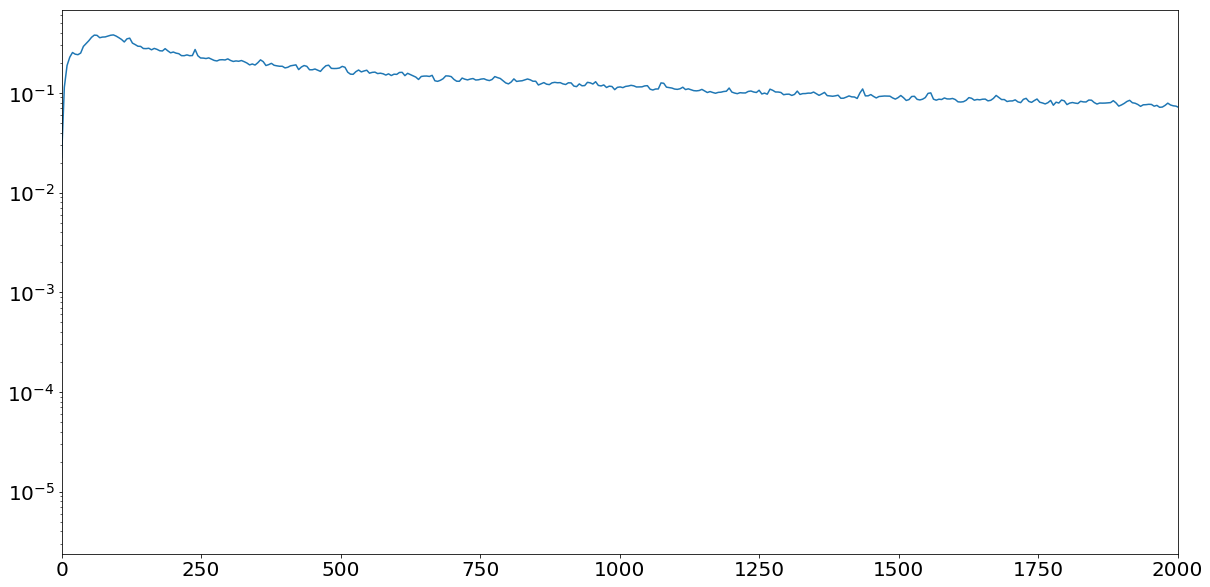

In [7]:
channel, start = welch_plot(data, fs, good_channels=good_channels)

### fft plot

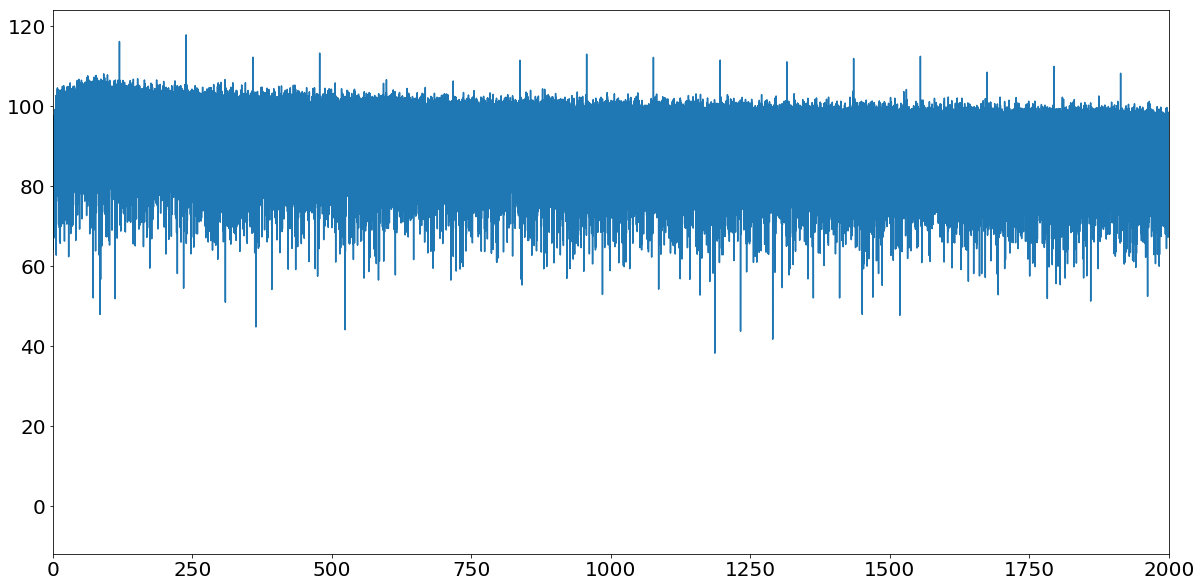

In [8]:
channel, start = fft_plot(data, fs, channel=channel, start=start)

## Atlas data

In [9]:
filename =  home + 'test_day/amplifier.bin'
num_channels = 128
fs = 30000
data_type = np.uint16
data = read_bin(filename, data_type, num_channels)
good_channels = np.load(home + 'test_day/good_channels.npy')

### Welch Plot

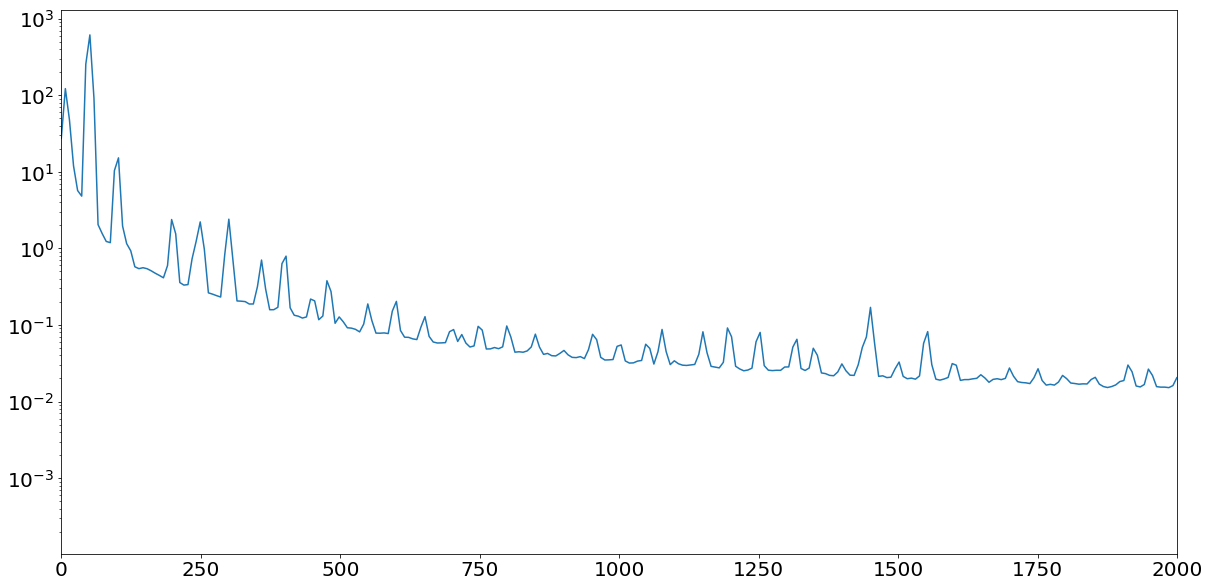

In [10]:
channel, start = welch_plot(data, fs, good_channels=good_channels,
                           preprocess = lambda x: (x - 32768) * 0.195)
# plt.vlines(50, 1e-3,1e2)
# plt.vlines(100, 1e-3,1e2)

### fft plot

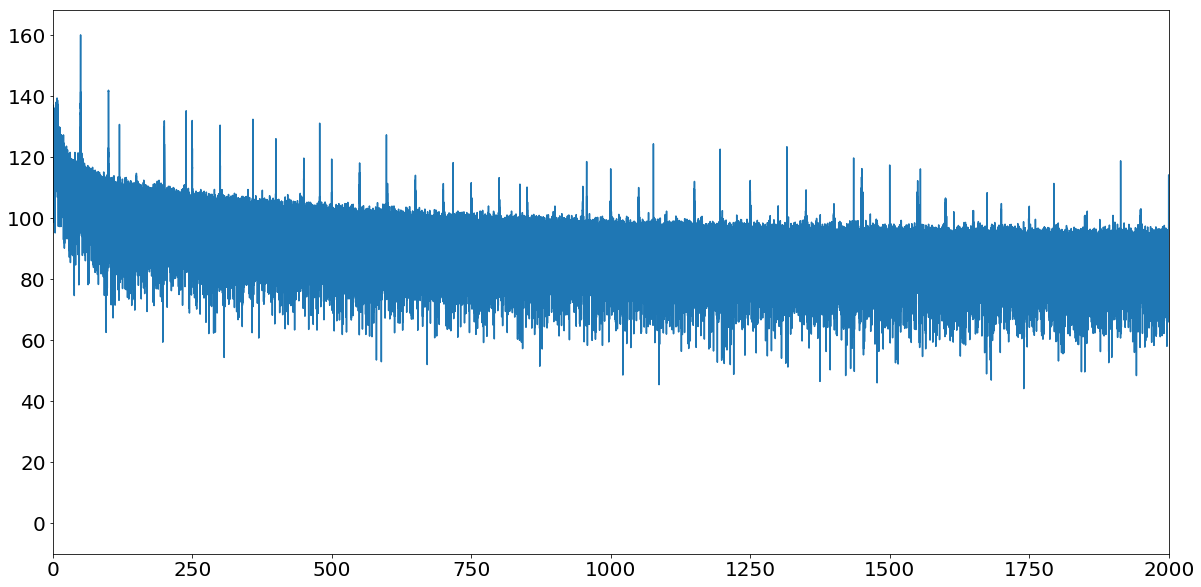

In [11]:
channel, start = fft_plot(data, fs, channel, start, good_channels=good_channels,
                           preprocess = lambda x: (x - 32768) * 0.195)

## CRCNS data

In [12]:
filename =  home + 'crcns/hc-2/ec014.333/crcns/hc2/ec014.333/ec014.333.dat'
num_channels = 64
fs = 20000
data_type = np.int16
data = read_bin(filename, data_type, num_channels)

### Welch plot

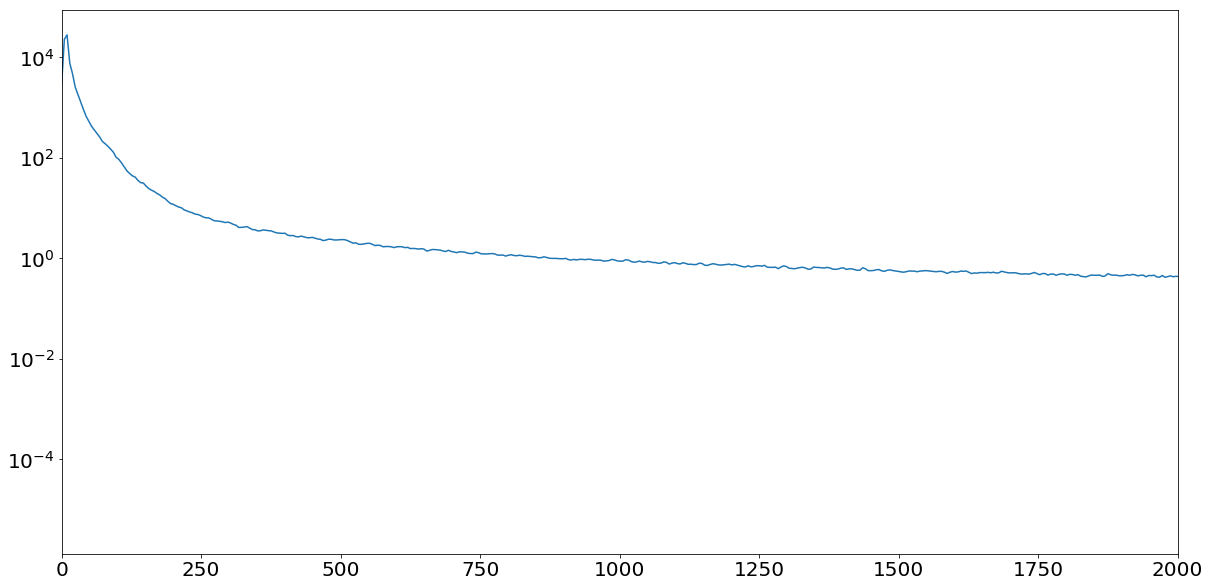

In [13]:
channel, start = welch_plot(data, fs)

### fft plot

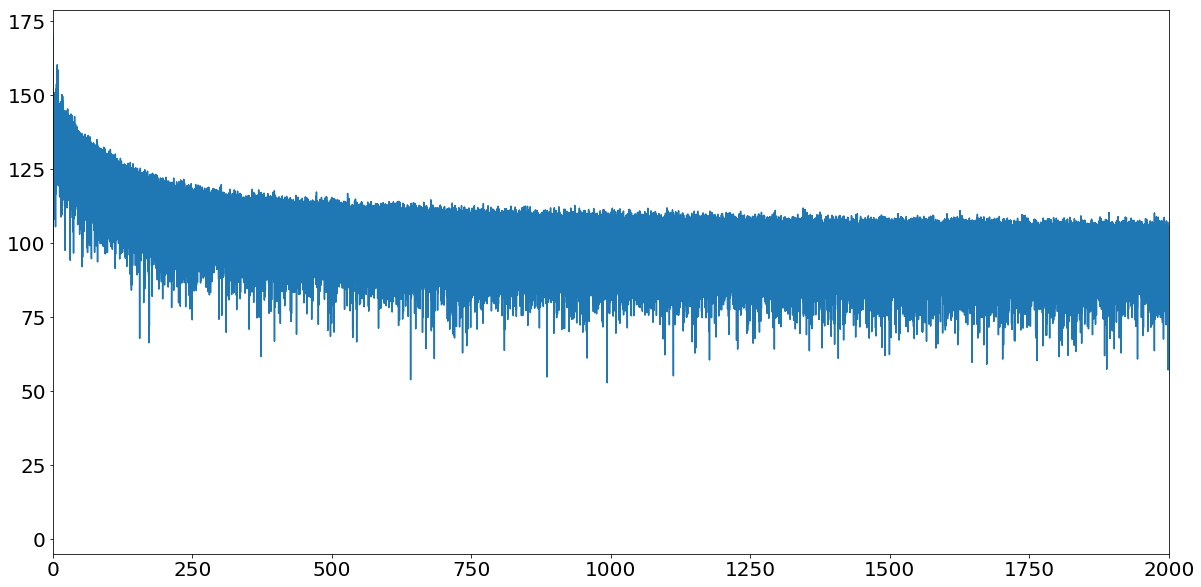

In [14]:
channel, start = fft_plot(data, fs, channel, start)